<a href="https://colab.research.google.com/github/Rioba-Ian/Deep_Learning/blob/main/Stochastic_Gradient_Descent_vs_Batch_Gradient_Descent_vs_Mini_Batch_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/DeepLearningML/8_sgd_vs_gd/homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
5,1170,2,38.0
10,1800,3,82.0
15,1175,2,42.0
1,2600,4,120.0
14,2250,3,101.0


# Scaling


In [18]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [19]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [20]:
np.ones(shape=(2))

array([1., 1.])

In [21]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]


    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):

        y_predicted =  np.dot(w, scaled_X.T) + b #w1 * area + w2 * bedrooms

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true - y_predicted))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(
    scaled_y.shape[0],), 500)

w, b, cost


(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

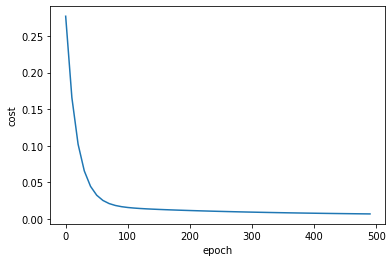

In [22]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list);

In [23]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]

    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b

    return sy.inverse_transform([[scaled_price]])[0][0]


predict(2600, 4,w,b)

128.45484403267596

In [24]:
predict(1000,2, w, b)

30.253094462442355

In [25]:
import random 
random.randint(0,6)

2

In [26]:
def stochastic_gradient_desccent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom, age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, total_samples -1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad 

        cost = np.square(sample_y - y_predicted)

        if i%100==0: #at every 100th iteration, record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list 

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_desccent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10000)

w_sgd, b_sgd, cost_sgd


(array([0.7069577 , 0.67545044]), -0.23198678813081813, 0.00030238877635405505)

In [27]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

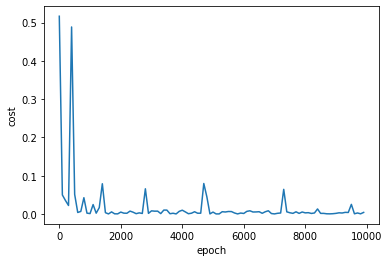

In [28]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [29]:
predict(2600, 4,w_sgd,b_sgd)

128.30932081218035

In [31]:
def mini_batch_gradient_descent(X, y_true, epochs=100, batch_size=5, learning_rate=0.01):

    number_of_features = X.shape[1]
    # number of array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b =0
    total_samples = X.shape[0] # number of rows in X

    if batch_size > total_samples:
        batch_size = total_samlpes

    cost_list = []
    epoch_list = []

    num_batches = int(total_samples/batch_size)

    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]

        for j in range(0, total_samples, batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b

            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad 

            cost = np.mean(np.square(yj - y_predicted)) #MSE 

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
        scaled_X,
        scaled_y.reshape(scaled_y.shape[0],),
        epochs = 120,
        batch_size = 5
    )

w, b, cost

(array([0.71012962, 0.67822737]), -0.23362351102524473, 0.019256671308362682)

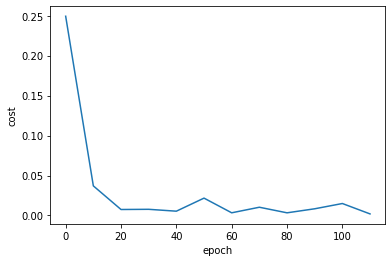

In [32]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [33]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]

    scaled_price = w[0] + scaled_X[0] + w[1]* scaled_X[1] + b

    return sy.inverse_transform([[scaled_price]])[0][0]

In [35]:
predict(2000, 4, w, b)

220.86091536469038

In [36]:
predict(1000, 2, w, b)

128.52884385960252

In [38]:
predict(1500, 3, w, b)

174.69487961214648